In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats import weightstats
from scipy import stats as stats
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('us_health_insurance_cleaned.csv')

### 1. Phân tích hai biến: Nhân khẩu học (demographic) tác động như thế nào?

#### 1.1. Kiểm định giả thuyết: Con trai và con gái sử dụng bảo hiểm y tế như nhau.
H0: μ(`charges`)[`'is_male' == 1`] = μ(`charges`)[`'is_male' == 0`]

H1: μ(`charges`)[`'is_male' == 1`] != μ(`charges`)[`'is_male' == 0`]

In [ ]:
df['is_male'].value_counts()

1    663
0    650
Name: is_male, dtype: int64

In [ ]:
male_charges = df[df['is_male'] == 1]['charges']
female_charges = df[df['is_male'] == 0]['charges']

male_charges_array = np.array(male_charges)
female_charges_array = np.array(female_charges)

variance_male = (male_charges_array).var(ddof = 1)
variance_female = (female_charges_array).var(ddof = 1)

print(f'Phương sai của giới tính nam: {variance_male:.2f}')
print(f'Phương sai của giới tính nữ: {variance_female:.2f}')

Phương sai của giới tính nam: 8525114999.80
Phương sai của giới tính nữ: 8571391607.22


In [ ]:
alpha = 0.05
confidence_level = 1 - alpha

col1 = weightstats.DescrStatsW(male_charges)
col2 = weightstats.DescrStatsW(female_charges)
cm_obj = weightstats.CompareMeans(col1, col2)
t, p = cm_obj.ztest_ind(usevar='unequal')
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha} nên bác bỏ H0.\n=> μ[Male] != μ[Female]')
else:
    print(f'Trị số p = {p:.4f} >= {alpha} nên chấp nhận H0.\n=> μ[Male] == μ[Female]')

Trị số p = 0.2859 >= 0.05 nên chấp nhận H0.
=> μ[Male] == μ[Female]


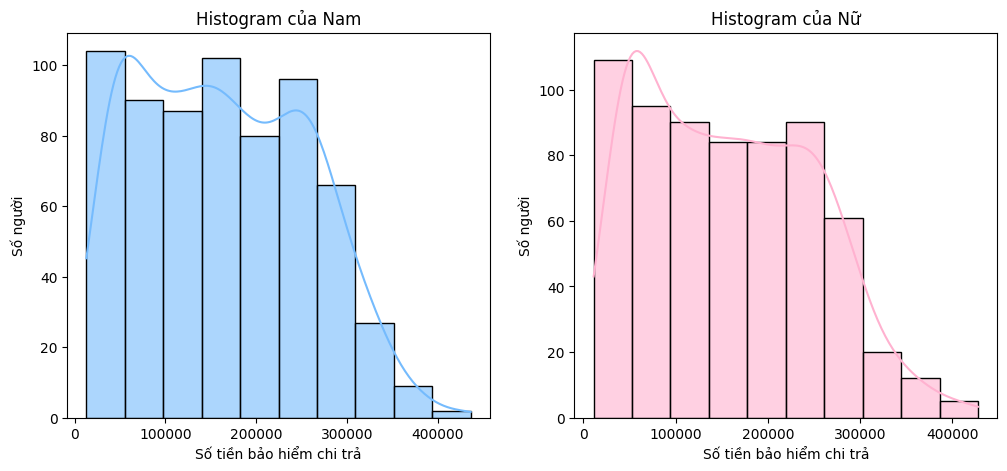

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(male_charges, bins=10, color=sns.xkcd_rgb['sky blue'], alpha=0.6, kde=True, ax=ax1)
ax1.set_title('Histogram của Nam')
ax1.set_xlabel('Số tiền bảo hiểm chi trả')
ax1.set_ylabel('Số người')

sns.histplot(female_charges, bins=10, color=sns.xkcd_rgb['powder pink'], alpha=0.6, kde=True, ax=ax2)
ax2.set_title('Histogram của Nữ')
ax2.set_xlabel('Số tiền bảo hiểm chi trả')
ax2.set_ylabel('Số người')
plt.show()

#### 1.2. Kiểm định giả thuyết: Số lần trung bình đóng lại bảo hiểm y tế của nhóm cao tuổi (người từ 60 tuổi trở lên) không ít hơn 39 lần.
H0: μ(`insur_renewals`)_[`'age' >= 60`] >= 39

H1: μ(`insur_renewals`)_[`'age' >= 60`] < 39

In [ ]:
def zDistribution(side, lower, upper):
    side = side.lower()
    if (side == 'left'):
        p = stats.norm.cdf(lower)
    elif (side == 'right'):
        p = 1 - stats.norm.cdf(upper)
    else:
        p = stats.norm.cdf(upper) - stats.norm.cdf(lower)
    return p

In [ ]:
elder_renewals = df[df['age'] >= 60]['insur_renewals']
renewals_count = elder_renewals.value_counts()

In [ ]:
alpha = 0.05
confidence_level = 1 - alpha
Muy0 = 39
n = len(elder_renewals)
ddof = n - 1
xBar = np.mean(elder_renewals)
std = np.std(elder_renewals)

In [ ]:
t_stat = (xBar - Muy0) / (std / (n ** .5))
print(f'Trị thống kê t_stat = {t_stat:.2f}')

Trị thống kê t_stat = -1.60


In [ ]:
p = zDistribution('left', t_stat, ddof)
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha:.4f} nên bác bỏ H0.\n=> {Muy0} > μ')
else:
    print(f'Trị số p = {p:.4f} >= {alpha:.4f} nên chấp nhận H0.\n=> {Muy0} <= μ')

Trị số p = 0.0545 >= 0.0500 nên chấp nhận H0.
=> 39 <= μ


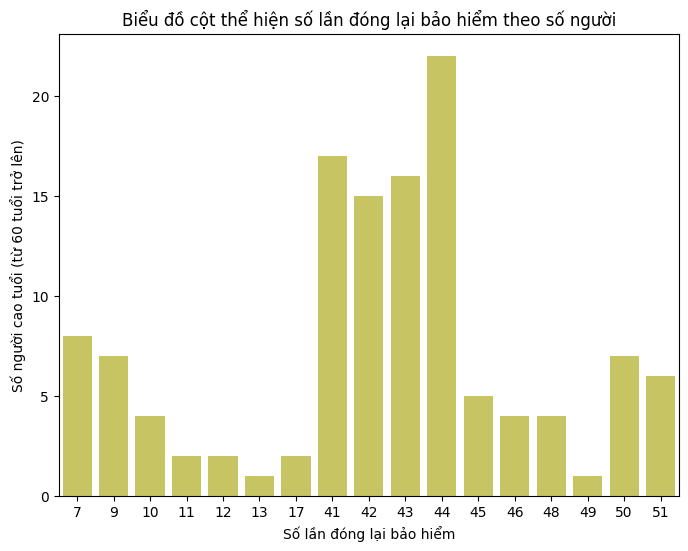

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=renewals_count.index, y=renewals_count.values,
            color=sns.xkcd_rgb['vomit yellow'], alpha=0.7)
plt.xlabel('Số lần đóng lại bảo hiểm')
plt.ylabel('Số người cao tuổi (từ 60 tuổi trở lên)')
plt.title('Biểu đồ cột thể hiện số lần đóng lại bảo hiểm theo số người')
plt.show()

### 2. Phân tích đa biến: Lối sống nghiện thuốc lá tác động như thế nào?

#### 2.1. Kiểm định giả thuyết: Người nghiện thuốc lá và người bình thường sử dụng bảo hiểm y tế khác nhau.
H0: μ(`charges`)[`'smoker' == 1`] = μ(`charges`)[`'smoker' == 0`]

H1: μ(`charges`)[`'smoker' == 1`] != μ(`charges`)[`'smoker' == 0`]

In [ ]:
df['smoker'].value_counts()

0    953
1    360
Name: smoker, dtype: int64

In [ ]:
smoker_charges = df[df['smoker'] == 1]['charges']
nonsmoker_charges = df[df['smoker'] == 0]['charges']

smoker_charges_array = np.array(smoker_charges)
nonsmoker_charges_array = np.array(nonsmoker_charges)

variance_smoker = (smoker_charges_array).var(ddof = 1)
variance_nonsmoker = (nonsmoker_charges_array).var(ddof = 1)

print(f'Phương sai của người nghiện: {variance_smoker:.2f}')
print(f'Phương sai của người bình thường: {variance_nonsmoker:.2f}')

Phương sai của người nghiện: 7952246651.29
Phương sai của người bình thường: 8582136205.57


In [ ]:
alpha = 0.05
confidence_level = 1 - alpha
col1 = weightstats.DescrStatsW(smoker_charges_array)
col2 = weightstats.DescrStatsW(nonsmoker_charges_array)
cm_obj = weightstats.CompareMeans(col1, col2)
t, p_value = cm_obj.ztest_ind(usevar='unequal')
if (p_value < alpha):
    print(f'Trị số p = {p_value} < {alpha} nên bác bỏ H0.\n=> μ[Smoker] != μ[Nonsmoker]')
else:
    print(f'Trị số p = {p_value} >= {alpha} nên chấp nhận H0.\n=> μ[Smoker] = μ[Nonsmoker]')

Trị số p = 1.232674037705928e-06 < 0.05 nên bác bỏ H0.
=> μ[Smoker] != μ[Nonsmoker]


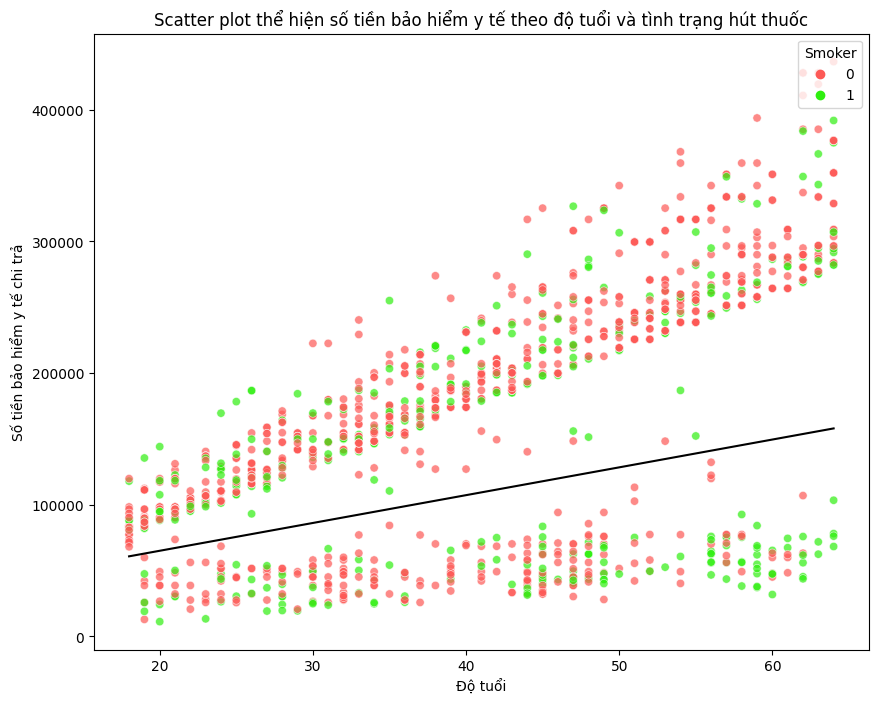

In [ ]:
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x='age', y='charges', hue='smoker', data=df,
                palette=[sns.xkcd_rgb['grapefruit'], sns.xkcd_rgb['vivid green']], alpha=0.7)
plt.xlabel('Độ tuổi')
plt.ylabel('Số tiền bảo hiểm y tế chi trả')
plt.title('Scatter plot thể hiện số tiền bảo hiểm y tế theo độ tuổi và tình trạng hút thuốc')
x_values = np.array([20, 65])
y_values = np.array([65000, 160000])
coefficients = np.polyfit(x_values, y_values, 1)
polynomial = np.poly1d(coefficients)
plt.plot(df['age'], polynomial(df['age']), color='black', linestyle='-')
handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles=handles[:2], labels=labels[:2], loc='upper right', title='Smoker')
plt.show()

#### 2.2. Kiểm định giả thuyết: Giới tính có ảnh hưởng tới lối sống hút thuốc không?
H0: `'is_male'` và `'smoker'` là hai biến độc lập

H1: `'is_male'` và `'smoker'` là hai biến phụ thuộc

In [ ]:
sex_smoker_crosstab = pd.crosstab(df['is_male'], df['smoker'],
                                  margins=True, margins_name='Tổng cộng')
sex_smoker_crosstab

smoker,0,1,Tổng cộng
is_male,,,
0,474,176,650
1,479,184,663
Tổng cộng,953,360,1313


In [ ]:
alpha            = 0.05
confidence_level = (1 - alpha)
stat, p, ddof, expected = stats.chi2_contingency(sex_smoker_crosstab)

In [ ]:
critical = stats.chi2.ppf(confidence_level, ddof)
print(f'probability={confidence_level:.4f}\ncritical={critical:.4f}\nstat={stat:.3f}')

probability=0.9500
critical=9.4877
stat=0.075


In [ ]:
if (p < alpha):
    print(f'Trị số p = {p:.4f} < {alpha:.4f} nên bác bỏ H0.\n=> Giới tính và lối sống hút thuốc có ảnh hưởng đến nhau.')
else:
    print(f'Trị số p = {p:.4f} >= {alpha:.4f} nên chấp nhận H0.\n=> Giới tính và lối sống hút thuốc không ảnh hưởng đến nhau.')

Trị số p = 0.9993 >= 0.0500 nên chấp nhận H0.
=> Giới tính và lối sống hút thuốc không ảnh hưởng đến nhau.


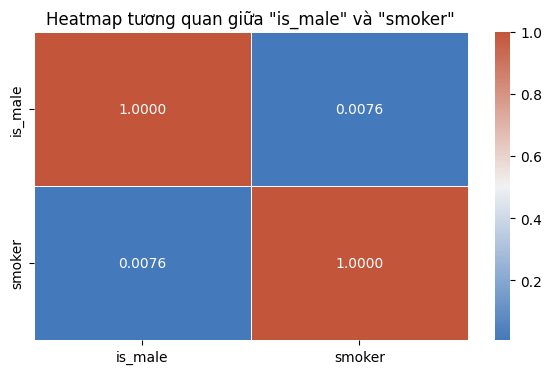

In [ ]:
subset_df = df[['is_male', 'smoker']]
sex_smoker_corrmt = subset_df.corr()

plt.figure(figsize=(7, 4))
sns.heatmap(sex_smoker_corrmt, annot=True, cmap=sns.diverging_palette(250, 20, as_cmap=True), fmt='.4f', linewidths=0.5)
plt.title('Heatmap tương quan giữa "is_male" và "smoker"')
plt.show()

In [ ]:
male_smoker = sex_smoker_crosstab.loc[1, 1]
male_non_smoker = sex_smoker_crosstab.loc[1, 0]
female_smoker = sex_smoker_crosstab.loc[0, 1]
female_non_smoker = sex_smoker_crosstab.loc[0, 0]

sex_smoker_df = pd.DataFrame({
    'is_male': ['Nam hút thuốc', 'Nam không hút thuốc', 'Nữ hút thuốc', 'Nữ không hút thuốc'],
    'count': [male_smoker, male_non_smoker, female_smoker, female_non_smoker]
})

group_color = [sns.xkcd_rgb['light blue grey'], sns.xkcd_rgb['powder pink'], sns.xkcd_rgb['sky blue'], sns.xkcd_rgb['grapefruit']]
sex_smoker_labels = {
    'is_male': 'Nhóm',
    'count': 'Số lượng'
}

fig = px.pie(sex_smoker_df, names='is_male', values='count', title='Tỷ lệ giới tính theo lối sống hút thuốc', color_discrete_sequence=group_color, labels=sex_smoker_labels)
fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    margin=dict(l=10, r=10, b=10, t=50),
    legend_orientation='h'
)
fig.show()

#### 2.3. Kiểm định giả thuyết: Số lượng người nghiện nằm ở độ tuổi thanh thiếu niên (từ 13 tuổi đến dưới 20 tuổi) sử dụng bảo hiểm y tế bằng người trung niên (trên 40 tuổi đến dưới 60 tuổi)?
H0: Sự khác biệt về `chi phí y tế` giữa `nhóm thanh thiếu niên` có `sử dụng thuốc lá` và `nhóm người trung niên` có `sử dụng thuốc lá` là không đáng kể.

H1: Có sự khác biệt đáng kể về `chi phí y tế` giữa `nhóm thanh thiếu niên` có `sử dụng thuốc lá` và `nhóm người trung niên` có `sử dụng thuốc lá`.

In [ ]:
teenagers_smoker = df[(df['age'] >= 13) & (df['age'] < 20) & (df['smoker'] == 1)]['charges']
middle_aged_smoker = df[(df['age'] > 40) & (df['age'] < 60) & (df['smoker'] == 1)]['charges']
teenagers_nonsmoker = df[(df['age'] >= 13) & (df['age'] < 20) & (df['smoker'] == 0)]['charges']
middle_aged_nonsmoker = df[(df['age'] > 40) & (df['age'] < 60) & (df['smoker'] == 0)]['charges']

teenagers_smoker_array = np.array(teenagers_smoker)
middle_aged_smoker_array = np.array(middle_aged_smoker)

variance_teenagers_smoker = teenagers_smoker_array.var(ddof=1)
variance_middle_aged_smoker = middle_aged_smoker_array.var(ddof=1)

print(f'Phương sai của thanh thiếu niên sử dụng thuốc lá: {variance_teenagers_smoker:.2f}')
print(f'Phương sai của trung niên sử dụng thuốc lá: {variance_middle_aged_smoker:.2f}')

Phương sai của thanh thiếu niên sử dụng thuốc lá: 1238378882.25
Phương sai của trung niên sử dụng thuốc lá: 9264396309.40


In [ ]:
alpha = 0.05
confidence_level = 1 - alpha
col1 = weightstats.DescrStatsW(teenagers_smoker_array)
col2 = weightstats.DescrStatsW(middle_aged_smoker_array)
cm_obj = weightstats.CompareMeans(col1, col2)
t, p_value = cm_obj.ztest_ind(usevar='unequal')
if p_value < alpha:
    print(f'Trị số p = {p_value} < {alpha} nên bác bỏ H0.\n=> Có sự khác biệt đáng kể về chi phí y tế giữa nhóm thanh thiếu niên hút thuốc và nhóm thanh thiếu niên không hút thuốc.')
else:
    print(f'Trị số p = {p_value} >= {alpha} nên chấp nhận H0.\n=> Sự khác biệt về chi phí y tế giữa nhóm thanh thiếu niên hút thuốc và nhóm thanh thiếu niên không hút thuốc là không đáng kể.')

Trị số p = 9.114636763676495e-09 < 0.05 nên bác bỏ H0.
=> Có sự khác biệt đáng kể về chi phí y tế giữa nhóm thanh thiếu niên hút thuốc và nhóm thanh thiếu niên không hút thuốc.


In [ ]:
data = {
    'age_group': ['Thanh thiếu niên', 'Trung niên'],
    'Có': [teenagers_smoker.mean(), middle_aged_smoker.mean()],
    'Không': [teenagers_nonsmoker.mean(), middle_aged_nonsmoker.mean()]
}
charges_lim = max(data['Có'] + data['Không']) * 1.2
df_bar = pd.DataFrame(data)
df_melted = pd.melt(df_bar, id_vars='age_group', var_name='smoker', value_name='charges')

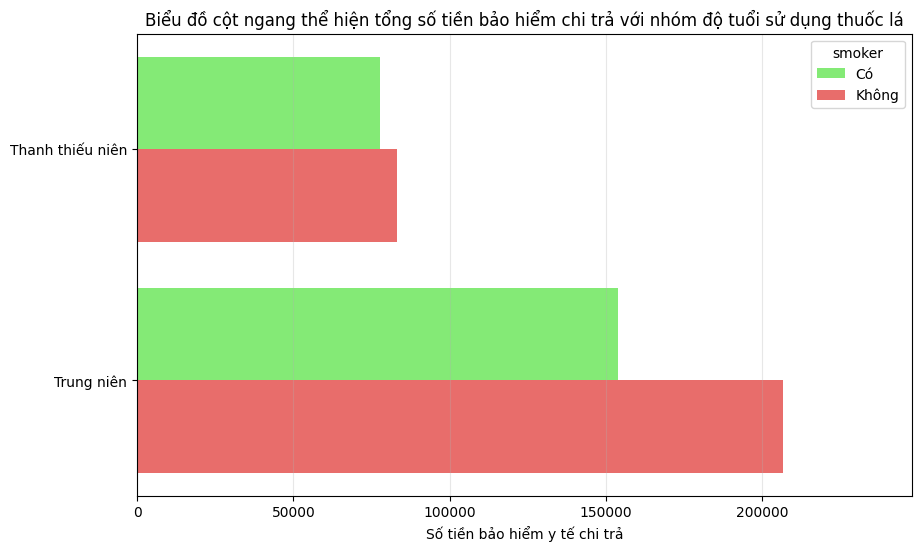

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlim(0, charges_lim)
plt.grid(axis='x', alpha=0.3)
sns.barplot(x='charges', y='age_group', hue='smoker', data=df_melted, palette={'Có': sns.xkcd_rgb['lighter green'], 'Không': sns.xkcd_rgb['grapefruit']})
plt.title('Biểu đồ cột ngang thể hiện tổng số tiền bảo hiểm chi trả với nhóm độ tuổi sử dụng thuốc lá')
plt.xlabel('Số tiền bảo hiểm y tế chi trả')
plt.ylabel('')
plt.show()